In [1]:
import numpy as np
import math
import time

def insertion_sort(array) :
    for i in range(1, len(array)) :
        key = array[i]
        j = i - 1
        while j >= 0 and array[j] > key :
            array[j+1] = array[j]
            j = j-1
        array[j+1] = key
    return array

def bucket_sort(array) :
    start_time = time.time()
    sorted_array = []
    n = len(array)
    new_array_b = [[0]]*(n)
    for i in range(n) :
        new_array_b[i] = []
    for i in range(n) :
        new_array_b[math.floor(n*array[i]/10**len(str(array[i])))].append(array[i])
    for i in range(n) :
        sorted_bi = insertion_sort(new_array_b[i])
        sorted_array = sorted_array + sorted_bi
    end_time = time.time()
    time_taken = end_time - start_time
    print(time_taken)
    return sorted_array

In [2]:
print("Bucket_sort result:", bucket_sort([21,23,54,67,89,12,34,85,45,95]))

7.605552673339844e-05
Bucket_sort result: [12, 21, 23, 34, 45, 54, 67, 85, 89, 95]


In [3]:
def counting_sort(array, B, k) :
    start_time = time.time()
    C = [0]*(k+1)
    for j in range(len(array)) :
        C[array[j]] = C[array[j]] + 1
    for i in range(1,k+1) :
        C[i] = C[i] + C[i-1]
    for j in range(len(array)-1,-1,-1) :
        B[C[array[j]]-1] = array[j]
        C[array[j]] = C[array[j]] - 1
    end_time = time.time()
    time_taken = end_time - start_time
    print(time_taken)
    return B

In [4]:
array = [21,23,54,67,89,12,34,85,45,95]
print("Counting_sort result:", counting_sort(array, [0]*len(array), max(array)))

6.437301635742188e-05
Counting_sort result: [12, 21, 23, 34, 45, 54, 67, 85, 89, 95]


In [5]:
def stable_count_sort(array, B, k, digits_array):
    C = [0]*(k+1)
    
    for j in range(len(array)):
        C[digits_array[j]] = C[digits_array[j]] + 1
    for i in range(1,k+1):
        C[i] = C[i] + C[i-1]
    for j in range(len(array)-1,-1,-1):
        B[C[digits_array[j]]-1] = array[j]
        C[digits_array[j]] = C[digits_array[j]] - 1
    return B

def radix_sort(array):
    start_time = time.time()
    d = len(str(array[0]))
    for i in range(0,d):
        digits_array = []
        for j in range(len(array)):
            digits_array.append((array[j]//10**i) % 10)
        array = stable_count_sort(array, [0]*len(array), max(digits_array), digits_array)
    end_time = time.time()
    time_taken = end_time - start_time
    print(time_taken)
    return array

In [6]:
print("Radix_sort result", radix_sort([21,23,54,67,89,12,34,85,45,95]))

8.225440979003906e-05
Radix_sort result [12, 21, 23, 34, 45, 54, 67, 85, 89, 95]


In [8]:
def partition(array, p, r) :
    x = array[r]
    i = p - 1
    for j in range(p, r) :
        if array[j] <= x :
            i = i + 1
            array[i], array[j] = array[j], array[i]
    array[i+1], array[r] = array[r], array[i+1]
    return i+1

def quick_sort(array, p, r) :
    if p < r:
        q = partition(array, p, r)
        quick_sort(array, p, q-1)
        quick_sort(array, q+1, r)
    return array

0.00016570091247558594
9.274482727050781e-05
0.00015997886657714844
0.0001595020294189453
0.00014901161193847656
0.00022983551025390625
0.00015091896057128906
0.00031876564025878906
0.00014734268188476562
0.00037384033203125
0.00015115737915039062
0.0004382133483886719


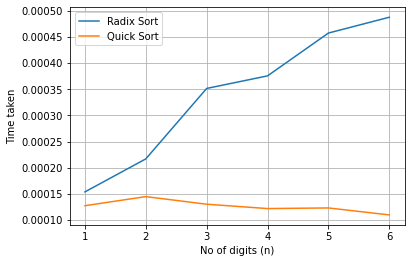

In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt

digit_size = []
bucket_sort_time = []
radix_sort_time = []
quick_sort_time = []
radix_sort_time_list = []
quick_sort_time_list = []
bucket_sort_time_list = []

for i in range(0,6):
    np.random.seed(0)
    n=20
    array = np.random.randint(10**i, (10**(i+1)) , n)
    digit_size.append(i+1)

    #Bcket sort
    bucket_start_time = time.time()
    bucket_sorted_arr = bucket_sort(array)
    bucket_sort_time = time.time() - bucket_start_time
    
    #Radix sort
    radix_start_time = time.time()
    radix_sorted_array = radix_sort(array)
    radix_sort_time = time.time() - radix_start_time

    #Quick sort
    quick_start_time = time.time()
    quick_sorted_array = quick_sort(array, 0, len(array)-1)
    quick_sort_time = time.time() - quick_start_time
        
    bucket_sort_time_list.append(bucket_sort_time)
    radix_sort_time_list.append(radix_sort_time)
    quick_sort_time_list.append(quick_sort_time)

plt.xlabel('No of digits (n)')
plt.ylabel('Time taken')
# plt.plot(digit_size, bucket_sort_time_list, label ='Bucket Sort')
plt.plot(digit_size, radix_sort_time_list, label = "Radix Sort")
plt.plot(digit_size, quick_sort_time_list, label = "Quick Sort")
plt.grid()
plt.legend()
plt.show()


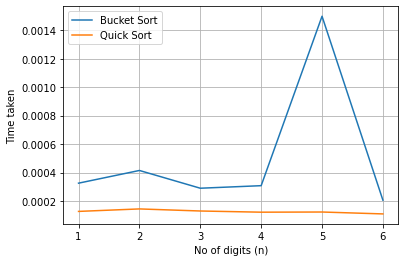

In [13]:
plt.xlabel('No of digits (n)')
plt.ylabel('Time taken')
plt.plot(digit_size, bucket_sort_time_list, label ='Bucket Sort')
plt.plot(digit_size, quick_sort_time_list, label = "Quick Sort")
plt.grid()
plt.legend()
plt.show()